<a href="https://colab.research.google.com/github/yassineklk/H4242-ML-Life_Expectancy/blob/main/Life_Expectancy_ML_TP_H4242.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy Analysis

by Hexanome 4242
Imadath Yaya, Malak El kouri, Dominique Drouilly Torres, Yassine Khalakhil


## Dataset

Life Expectancy Dataset: This dataset contains information about the life expectancy at birth of 193 countries. It has 22 attributes, including the life expectancy of each country. The task is to predict the life expectancy based on the other features. You can find this dataset on Kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). This dataset is relatively large (2938 instances), noisy and complex. It has a mix of numerical and categorical features that may require some encoding and scaling. The target variable (life expectancy) is also numerical and continuous. Some challenges may arise from the missing values, outliers, multicollinearity, etc.


### Library import




In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px

### Dataset reading

In [ ]:
!git clone "https://github.com/yassineklk/H4242-ML-Life_Expectancy.git"
df = pd.read_csv('/content/H4242-ML-Life_Expectancy/Life Expectancy Data.csv')

fatal: destination path 'H4242-ML-Life_Expectancy' already exists and is not an empty directory.


## Data exploration


In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


The columns of the dataset

In [ ]:
# getting the columns of the dataset
df.columns = df.columns.str.title()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
columns = list(df.columns)
columns

['Country',
 'Year',
 'Status',
 'Life_Expectancy',
 'Adult_Mortality',
 'Infant_Deaths',
 'Alcohol',
 'Percentage_Expenditure',
 'Hepatitis_B',
 'Measles',
 'Bmi',
 'Under-Five_Deaths',
 'Polio',
 'Total_Expenditure',
 'Diphtheria',
 'Hiv/Aids',
 'Gdp',
 'Population',
 'Thinness__1-19_Years',
 'Thinness_5-9_Years',
 'Income_Composition_Of_Resources',
 'Schooling']

Country represented in the *dataset*


In [ ]:
country = df.groupby('Country')

list_country = []

for key,value in country:
    if key not in list_country:
        list_country.append(key)

print(list_country)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary

Which years are represented in the data?

In [ ]:
min_year = df['Year'].min()
max_year = df['Year'].max()
print ('The years represented in this report go from' , min_year, 'to' , max_year)

The years represented in this report go from 2000 to 2015


Display of the number of missing values, the percentage of missing values and the type of data


In [ ]:
miss_df = pd.DataFrame({'ColumnName':[], 'TotalMissingVals':[],'PercentMissing':[], 'Type de données': []})
for col in df.columns:
    sum_miss_val = df[col].isnull().sum()
    percent_miss_val = round((sum_miss_val/df.shape[0])*100,2)
    data_type = df[col].dtype
    miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val,data_type])),ignore_index=True)

print(f"Number of columns with missing values: {str(miss_df[miss_df['PercentMissing']>0.0].shape[0])}")
display (miss_df)

Number of columns with missing values: 14


<ipython-input-112-3463a3f92295>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-112-3463a3f92295>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-112-3463a3f92295>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-112-3463a3f92295>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-112-3463a3f92295>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-112-3463a3f92295>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,ColumnName,TotalMissingVals,PercentMissing,Type de données
0,Country,0.0,0.00,object
1,Year,0.0,0.00,int64
2,Status,0.0,0.00,object
3,Life_Expectancy,10.0,0.34,float64
4,Adult_Mortality,10.0,0.34,float64
5,Infant_Deaths,0.0,0.00,int64
6,Alcohol,194.0,6.60,float64
7,Percentage_Expenditure,0.0,0.00,float64
8,Hepatitis_B,553.0,18.82,float64
9,Measles,0.0,0.00,int64


The proportion of missing values in GDP and population columns are respectively 15% and 22%.

**Frequency of features :**

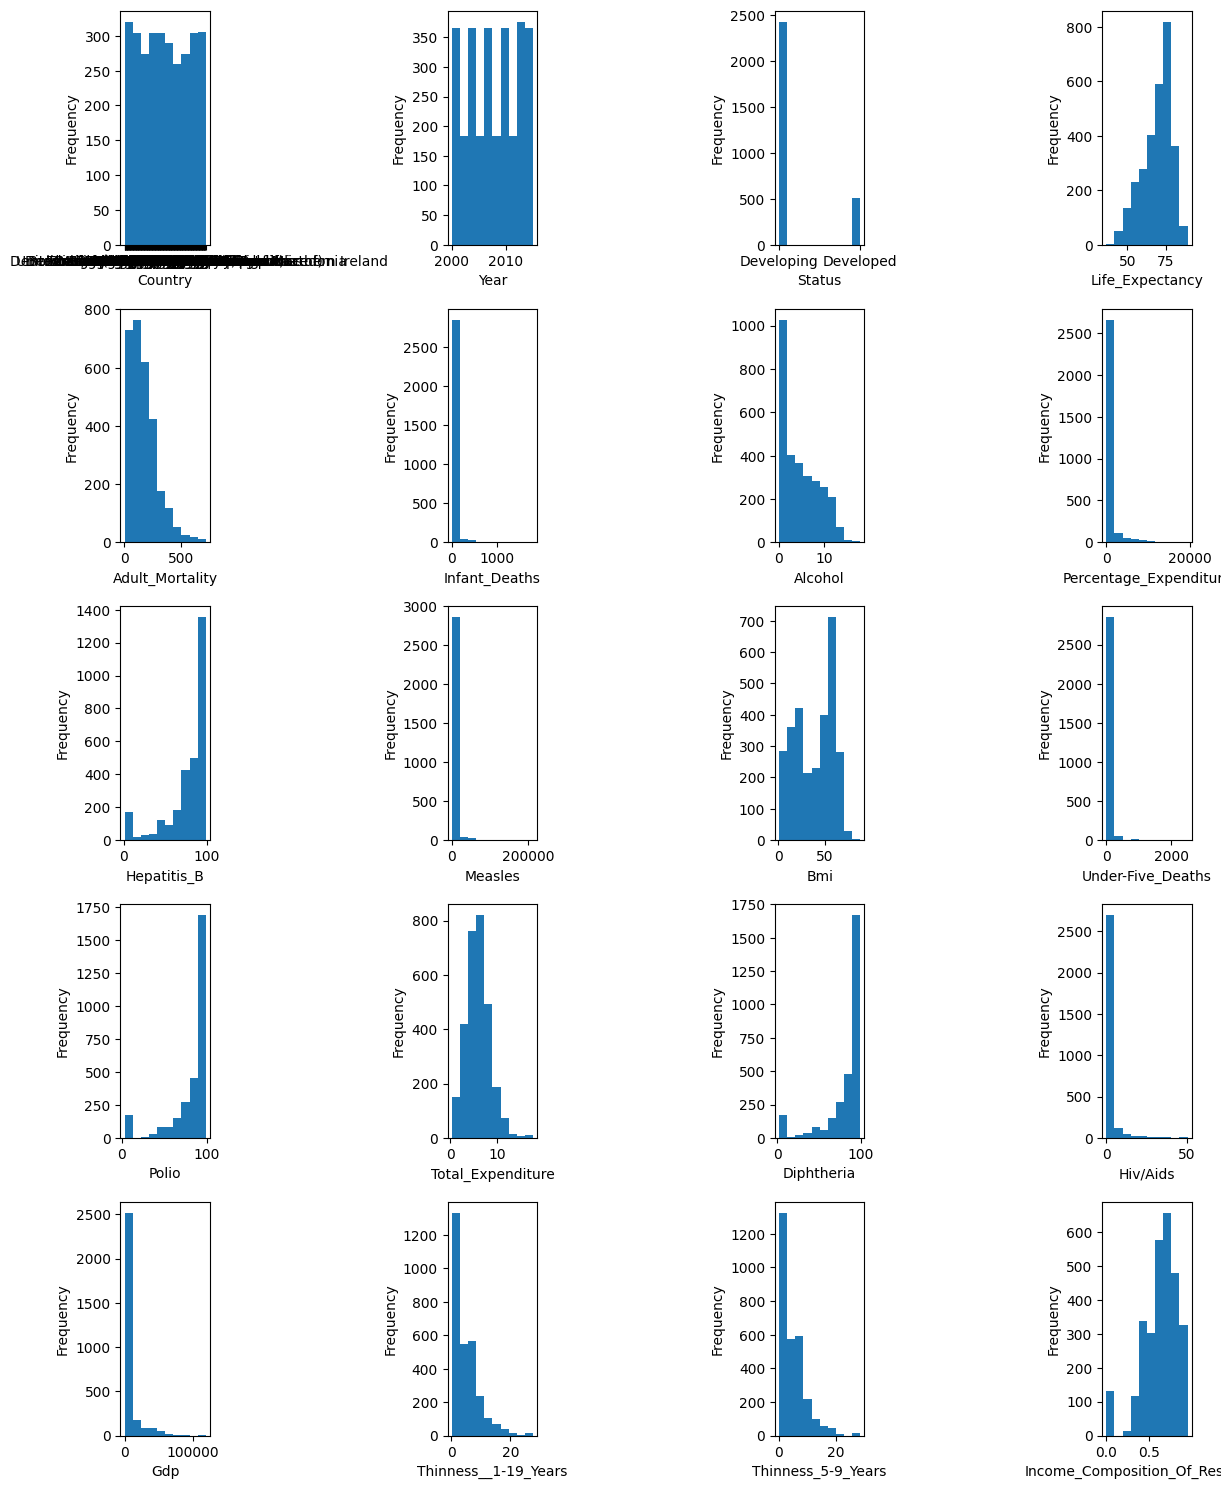

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 15))
for i, ax in enumerate(axes.flat):
    if i < len(df.columns):
        col = df.columns[i]
        ax.hist(df[col])
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

##Plot showing the population of the top 30 countries in 2015

<ipython-input-114-6f3e6a3195d8>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



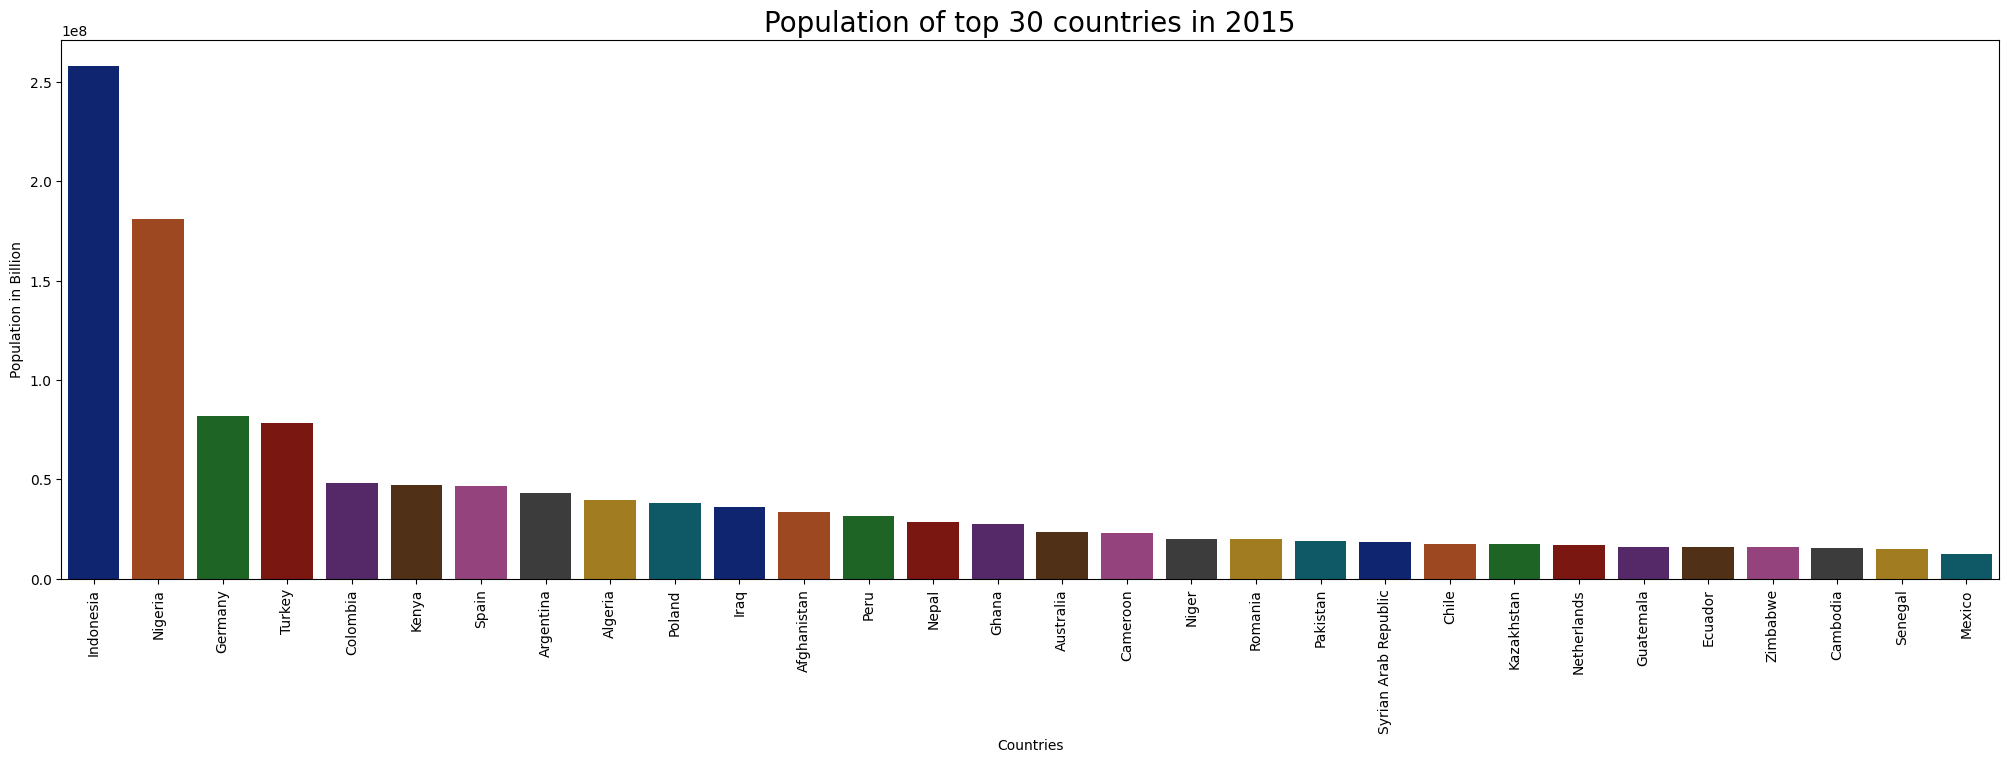

In [ ]:

population_sort = df.sort_values(['Population'], ascending=False)

current_population = population_sort[df['Year'] == 2015][:30]

plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = current_population['Country'][:30], y = current_population['Population'][:30], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 10)
ax.set_title(label = 'Population of top 30 countries in 2015', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

***Distribution of the 'Life expectancy' variable***

In [ ]:
fig=px.histogram(df,x="Life_Expectancy",template='plotly_dark')
fig.show()


***Life expectancy Based on Countries status***

In [ ]:
fig=px.violin(df,x='Status',y="Life_Expectancy",color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

##HeatMap

<ipython-input-117-0795089c8268>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



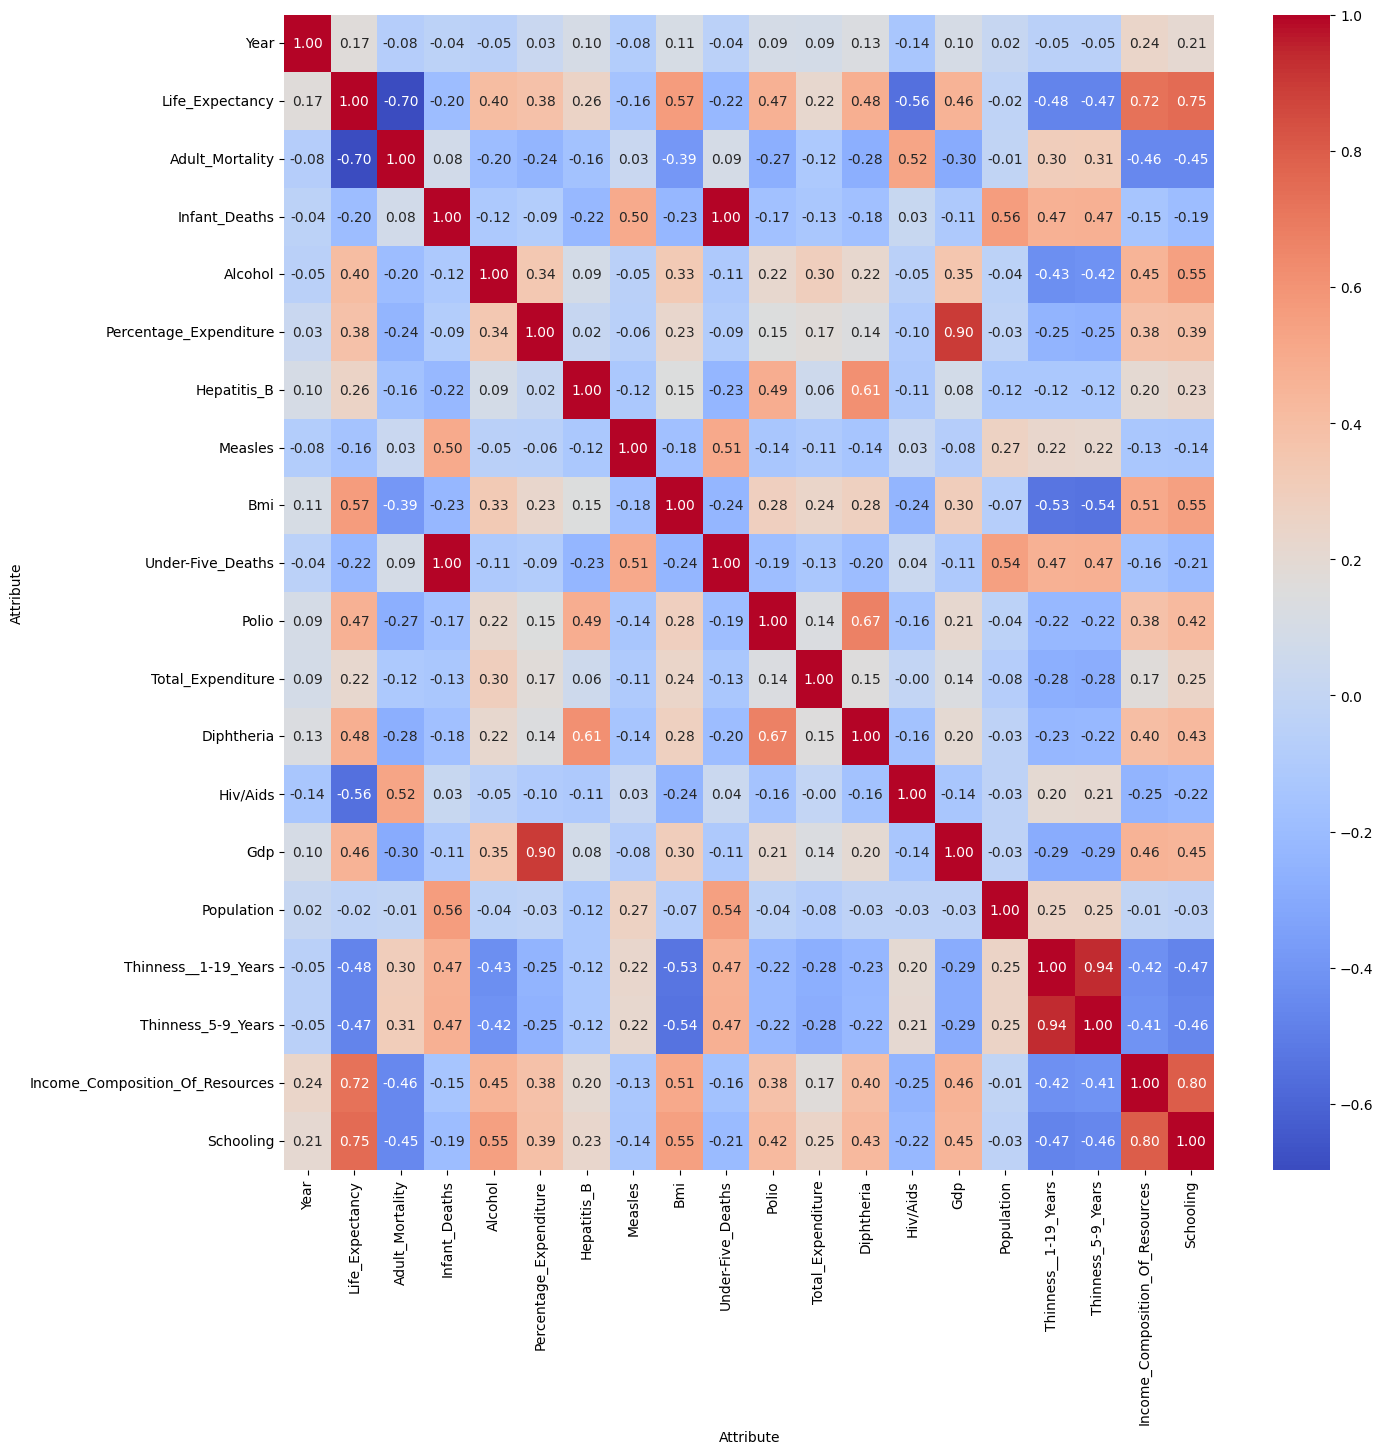

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.xlabel('Attribute')
plt.ylabel('Attribute')
plt.show()

A heatmap is a graphical representation of a correlation matrix that uses colors to represent the values of the matrix. Heatmaps can be used to visualize correlations between multiple variables related to life expectancy, such as GDP, HDI, air quality index, etc.
In our case, we can deduce some important correlation between:
- Life Expenctancy & Schooling
- Life Expenctancy & Income composition of resources
- Life Expenctancy & GPD
- Life Expenctancy & BMI

There are somme other correlation that we found irrelevant or obvious for our study as:
- Life Expenctancy & Adult Mortality
- GPD & Percentage Expenditure

It is important to note that correlation does not necessarily imply a cause-and-effect relationship between variables. Therefore, it is important to consider other factors before drawing conclusions from a heatmap.

Analysis the correlation between Life Expenc

## Data Cleaning

**Missing values handling :**


***Population feature :***

> As we have previously observed, the Population column in our dataset contains a significant amount of missing values, with approximately 22% of the column's data being incomplete. This means that a significant portion of our data may not be accurately represented, potentially leading to biased or skewed results if left unaddressed.

In [ ]:
# Group the dataset by country
countries = df.groupby('Country')

# Get the rows with null population for each country
null_pop_rows = countries.apply(lambda x: x[x['Population'].isnull()])

countries_with_missing_population = null_pop_rows['Country'].unique()

# Count the number of countries with missing population values
num_countries_with_missing_population = len(countries_with_missing_population)

# Get the total number of unique countries in the dataset
num_total_countries = len(df['Country'].unique())

# Calculate the proportion of countries with missing population values
prop_countries_with_missing_population = num_countries_with_missing_population / num_total_countries
prop_countries_with_missing_population

0.2538860103626943



> **Conclusion :** 25% of all countries do not have any information available regarding their population. Consequently, we can conclude that the Population column is missing a significant amount of data, which may hinder the accuracy of our analysis. Therefore, to avoid any potential errors or biases in our model, we have decided to drop the Population column from our dataset.



In [ ]:
df = df.drop('Population', axis=1)

***All other features:***

>
One approach to handling missing values is to impute them with the mean value of the corresponding feature for the same country. By using the mean of the feature values for a particular country, we can preserve the general characteristics of that country while filling in the missing values.


In [ ]:
for col in df.columns:
  if  df[col].dtype == 'int64' or df[col].dtype =='float64' :
    # Calculate the mean population value for each country
    mean_by_country = df.groupby('Country')[col].transform('mean')

    # Replace missing population values with the corresponding mean value
    df[col] = df[col].fillna(mean_by_country)



In [ ]:
# examinating missing values
print(df.isnull().mean())

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life_Expectancy                    0.003404
Adult_Mortality                    0.003404
Infant_Deaths                      0.000000
Alcohol                            0.005786
Percentage_Expenditure             0.000000
Hepatitis_B                        0.049013
Measles                            0.000000
Bmi                                0.011572
Under-Five_Deaths                  0.000000
Polio                              0.000000
Total_Expenditure                  0.010892
Diphtheria                         0.000000
Hiv/Aids                           0.000000
Gdp                                0.137849
Thinness__1-19_Years               0.011572
Thinness_5-9_Years                 0.011572
Income_Composition_Of_Resources    0.056841
Schooling                          0.055480
dtype: float64




> We still have missing values in many numerical columns. To handle this, we will fill all missing values with the mean value of the respective feature. This will ensure that we have a complete dataset to work with for training and testing our models.






In [ ]:
for col in df.columns:
  if  df[col].dtype == 'int' or df[col].dtype =='float' :
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
print(df.isnull().mean())

Country                            0.0
Year                               0.0
Status                             0.0
Life_Expectancy                    0.0
Adult_Mortality                    0.0
Infant_Deaths                      0.0
Alcohol                            0.0
Percentage_Expenditure             0.0
Hepatitis_B                        0.0
Measles                            0.0
Bmi                                0.0
Under-Five_Deaths                  0.0
Polio                              0.0
Total_Expenditure                  0.0
Diphtheria                         0.0
Hiv/Aids                           0.0
Gdp                                0.0
Thinness__1-19_Years               0.0
Thinness_5-9_Years                 0.0
Income_Composition_Of_Resources    0.0
Schooling                          0.0
dtype: float64


## Data preprocessing :

**Categorical Features encoding**

> The only columns with categorical variables are Country and Status.



> To encode these two features, each categorical value will be replaced by the mean life expactancy value of all the rows that have the same categorical value.



> Thus, we will define a custom encoder to be able to flexibly use in the following



In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_dicts = {}

    def fit(self, X, y):
        for col in X.columns:
            if X[col].dtype == 'object':
                # Group the dataset by the categorical column and calculate the mean of y for each category
                mean_y_by_col = y.groupby(X[col]).mean()

                # Create a dictionary with the mean of y for each category
                mean_y_dict = mean_y_by_col.to_dict()

                # Save the dictionary for the current column
                self.mean_dicts[col] = mean_y_dict
        return self

    def transform(self, X):
        X_ = X.copy()
        for col, mean_dict in self.mean_dicts.items():
            # Replace the category values with the corresponding mean values in the dataset or the global mean if it can't be mapped to any  value
            X_[col] = X_[col].map(lambda x: mean_dict.get(x, np.nanmean(list(mean_dict.values()))))
        return X_

## Initial Model Training:


*We want to train different models: For example, we can consider the models introduced during the course: linear regression, ridge regression, kernel ridge regression, kernel ridge regression.We will also consider at least one additional model, not introduced during the course, such as random forest, multi-layers perceptron, etc. For this additional model, we will explain what are its parameters and hyper-parameters. We will also explain how its hyper-parameters are related to the bias-variance tradeoff.*

Before tuning the hyperparameters of the models, we will take an overview of their performance without any adjustments. We will perform preprocessing of the data and then evaluate the models using common metrics such as mean absolute error, mean squared error, train and test R-squared scores. Initially, we will split the data using an 80/20 train-test split and cross-validate the results using five-fold cross-validation. By evaluating the models in this way, we can get a sense of how they perform and identify any issues such as overfitting or underfitting. Once we have a baseline understanding of the models' performance, we will begin to tune their hyperparameters to optimize their performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y= df["Life_Expectancy"]
X=  df.drop(["Life_Expectancy"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# Initialize the MeanEncoder transformer
mean_encoder = MeanEncoder()
# Fit the transformer to the training dataset
mean_encoder.fit(X_train,y_train)

X_train_encoded = mean_encoder.transform(X_train)

# Apply mean encoding to the test dataset
X_test_encoded = mean_encoder.transform(X_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_encoded)

X_train_scaled = scaler.transform(X_train_encoded)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,Bmi,Under-Five_Deaths,Polio,Total_Expenditure,Diphtheria,Hiv/Aids,Gdp,Thinness__1-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,0.390475,-0.116557,-0.463109,-0.318479,-0.257514,0.167571,-0.192120,0.704355,-0.200110,-0.654211,-0.262215,0.660204,-0.659499,0.661645,-0.225454,-0.318925,0.753741,0.709445,-0.143247,-0.038796
1,0.390475,-1.417792,-0.463109,-0.110535,-0.257514,-0.198766,-0.291864,0.074513,-0.200110,-0.824603,-0.262215,0.361114,-0.298700,-3.075853,-0.187469,-0.459381,1.050729,1.001180,-0.341601,-0.315474
2,0.489669,0.750932,-0.463109,-0.182516,-0.257514,1.451000,-0.369082,0.827394,-0.200110,0.297983,-0.262215,0.702931,0.670185,0.703639,-0.320418,0.006128,-0.114379,-0.120876,0.506360,0.268623
3,0.540531,1.184677,-0.463109,-1.222237,-0.230683,-0.826774,-0.064479,0.786381,-0.198729,1.039691,-0.242595,0.660204,0.540460,0.661645,-0.320418,-0.236088,0.365371,0.327946,0.441895,0.821978
4,0.775545,-1.200920,-0.463109,-0.566413,-0.257514,-1.115857,0.113299,0.827394,-0.200110,-0.528922,-0.262215,0.702931,-1.024351,0.493667,-0.320418,0.727520,0.433907,0.283064,0.937778,0.391591


In [ ]:
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,Bmi,Under-Five_Deaths,Polio,Total_Expenditure,Diphtheria,Hiv/Aids,Gdp,Thinness__1-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,0.183241,-0.333430,-0.463109,-0.342473,-0.185965,-0.906521,-0.306254,0.171187,-0.155491,0.498445,-0.196816,0.019298,-0.870302,-3.117848,-0.320418,-0.421790,0.365371,0.327946,0.025353,-0.192506
1,0.730403,-0.333430,2.159317,-0.422451,-0.257514,1.799893,0.427789,0.713469,-0.200024,0.979553,-0.262215,0.574750,0.414788,0.577656,-0.320418,0.309763,-0.685511,-0.681904,0.754302,0.576042
2,0.579928,-0.116557,-0.463109,-0.326477,-0.257514,0.092809,-0.021515,-2.863771,-0.200110,0.934449,-0.262215,0.403841,0.329656,0.409679,-0.320418,-0.102163,-0.616975,-0.592140,0.650166,0.483817
3,0.688787,1.401550,-0.463109,-1.270224,-0.257514,-0.756995,-0.180958,0.786381,-0.196140,1.220107,-0.262215,0.660204,-0.383833,0.661645,-0.320418,1.347524,0.296836,0.260623,0.937778,0.760494
4,-1.266559,-1.634665,-0.463109,2.096873,0.431141,-0.771948,-0.368732,-0.174494,1.612415,-1.210492,0.529116,-3.185234,-0.505450,-0.010265,3.098254,-0.552712,1.005039,0.956297,-0.906908,-1.114764


In [ ]:
def fit_evaluate(models_dic, x_train, x_test, y_train, y_test):
    mae, rmse, train_acc, test_acc = [], [], [], []
    performance ={}

    for name, model in models_dic.items():
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        mae.append(mean_absolute_error(y_test, prediction))
        rmse.append(mean_squared_error(y_test, prediction, squared=False))
        train_acc.append(model.score(x_train, y_train))
        test_acc.append(model.score(x_test, y_test))

    performance['mean_absolute_error'] = mae
    performance['mean_squared_error'] = rmse
    performance['train_R_squared'] = train_acc
    performance['test_R_squared'] = test_acc

    return pd.DataFrame(performance, index = models_dic.keys())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error

models = { 'Linear Regression' : LinearRegression(),
           'Ridge' : Ridge(),
           'Lasso' : Lasso(),
           'Kernel Ridge': KernelRidge(kernel='rbf'),
           'XGBoost': XGBRegressor()
          }

results = fit_evaluate(models, X_train_scaled, X_test_scaled, y_train, y_test)
results

,mean_absolute_error,mean_squared_error,train_R_squared,test_R_squared
Linear Regression,1.235237,1.879875,0.957081,0.959209
Ridge,1.234583,1.879831,0.957078,0.959211
Lasso,1.591517,2.418081,0.931745,0.932509
Kernel Ridge,2.995273,4.885038,0.839360,0.724551
XGBoost,0.930262,1.466245,0.999199,0.975185


 Looking at the results, the lowest mean_absolute_error and mean_squared_error are obtained by XGBoost model. It also shows the highest R-squared value for the test set, indicating a good fit to the data.

Linear Regression and Ridge Regression are close in terms of performance, with slightly better performance for Ridge. However, Lasso and Kernel Ridge models have higher mean_absolute_error and mean_squared_error values, indicating worse performance compared to the other models.

The Kernel Ridge model seems to be underfitting the data, as indicated by the low R-squared values for both train and test sets. On the other hand, the XGBoost model has the highest R-squared value for the train set, which is close to 1, indicating potential overfitting of the data.


 **Linear regression :**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

#Linear regression
reg = LinearRegression()

#Fitting model over training data
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_test_scaled)


print(f'Train Accuracy {round(reg.score(X_train_scaled, y_train)* 100,2)}%')
print(f'Test Accuracy {round(reg.score(X_test_scaled, y_test)* 100,2)}%')

print("Coefficients:", reg.coef_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

Train Accuracy 95.71%
Test Accuracy 95.92%
Coefficients: [ 8.30864167e+00  1.40514847e+00  7.69398163e-02 -2.71288219e-01
  1.82812530e+00 -4.61332165e-02  2.00861428e-01 -8.98596552e-02
 -7.86107582e-02 -9.33738779e-02 -1.86534159e+00  7.27954662e-02
 -1.92107760e-02  2.00232415e-01 -5.65307543e-01 -1.43161492e-01
 -5.14819775e-02 -2.87169726e-02 -2.58791271e-03  3.04947865e-01]
Mean squared error: 3.53393000651217
Mean absolute error: 1.235236952079339
R2 score: 0.9592091105071565


The coefficient of determination R² came out closer to 1, indicating the model optimally predicts the Life expectancies.
For validation of the model, let's check the distribution of residuals.

***Residuals error :***

A residual error is a measure of the vertical distance between a data point and the corresponding point on the regression line. It represents the difference between the predicted value and the actual observed value. The regression line that minimizes the sum of residual errors is considered the best-fit line.

To validate the model, it is important to examine the distribution of residuals.


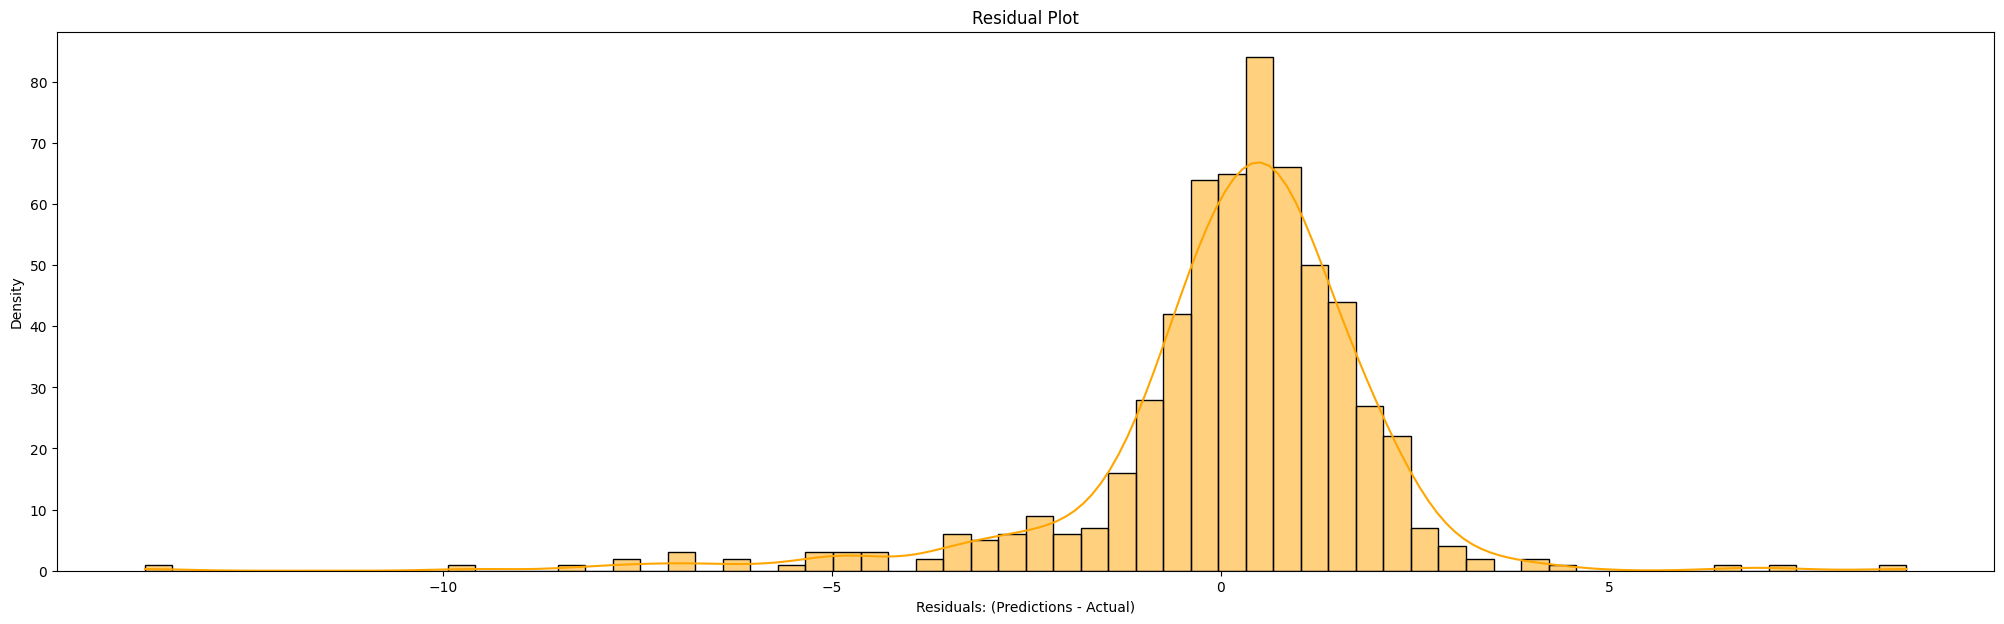

In [ ]:
residuals = y_pred - y_test
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel ('Density');

Residual distribution is approximately normal having a mean close to 1. While  the mean of the residuals is supposed to be close to zero, the result suggest that the model is making predictions that are slightly biased, but still relatively accurate on average

The R² value close to 1 suggests that our model has a strong fit over the test dataset. These results indicate that our model can accurately predict Life Expectancy. Therefore, we can conclude that our model is highly efficient in making predictions for the given dataset.



# Hyperparameter tuning (Using K-Fold Cross Validation)
In the following hyperparameter tuning section, we will focus on optimizing the performance of our machine learning models. To achieve this, we will be using a combination of grid search and cross-validation to evaluate the models' performance on different subsets of the training data. As scaling and transformations will be required at each fold, we will first read the raw X and y data and use pipelines to encapsulate the scaling and transformation steps with the model. This will enable us to streamline the hyperparameter tuning process and avoid data leakage. It is worth noting that hyperparameter tuning can be computationally expensive for some models, and to address this issue, we have implemented RandomSearch as an alternative to GridSearch. This will allow us to analyze a pre-selected number of hyperparameter combinations more efficiently.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold, ParameterGrid
from sklearn.metrics import make_scorer

def hyperparameter_tuning(model, X, y, param_grid, scoring_metric, n_splits=5,  n_iteration= 6):

    # Define k-fold cross-validation
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Define the grid search object
    #grid_search = GridSearchCV(model, param_grid=param_grid, scoring=scoring_metric, cv=cv)

    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iteration, cv=cv, scoring='r2')

    # Fit the grid search to the data
    random_search.fit(X, y)

    # Print the best hyperparameters and the corresponding score
    print(" Best hyperparameters: ", random_search.best_params_)
    print(" Best score: ", random_search.best_score_)

    # Return the best estimator
    return random_search.best_estimator_

**Ridge Regression:**

In [ ]:
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(steps=[
    ('mean_encoder', MeanEncoder()),('scaler', StandardScaler())])

# Define the pipeline by adding Ridge regression as the estimator
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', Ridge())
])

# Define the hyperparameters to tune and their possible values ( alpha :  controls the weighting of the penalty to the loss function)
param_grid = {'estimator__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Best ridge model using 5 splits :")
best_ridge_model = hyperparameter_tuning(ridge_model, X_train, y_train, param_grid, 'r2')
print("Best ridge model using 10 splits : ")
best_ridge_model_10 = hyperparameter_tuning(ridge_model, X_train, y_train, param_grid, 'r2',10)
print("Best ridge model using 20 splits : ")
best_ridge_model_20 = hyperparameter_tuning(ridge_model, X_train, y_train, param_grid, 'r2',20)

Best ridge model using 5 splits :
 Best hyperparameters:  {'estimator__alpha': 10}
 Best score:  0.9473868299070671
Best ridge model using 10 splits : 
 Best hyperparameters:  {'estimator__alpha': 1}
 Best score:  0.9485239706261928
Best ridge model using 20 splits : 
 Best hyperparameters:  {'estimator__alpha': 10}
 Best score:  0.9489022453215193



The results indicate that using a higher number of splits in cross-validation leads to a slightly better performance for the model. Specifically, the model with 20 splits achieved the highest R-squared score of 0.9489, while the models with 5 and 10 splits had slightly lower scores of 0.9474 and 0.9485, respectively.

The best hyperparameter for the models with 5 and 20 splits was 10, while the best hyperparameter for the model with 10 splits was 1. This suggests that the regularization strength of the model should be relatively high to achieve the best performance.

Mean squared error: 3.53
R-squared: 0.96


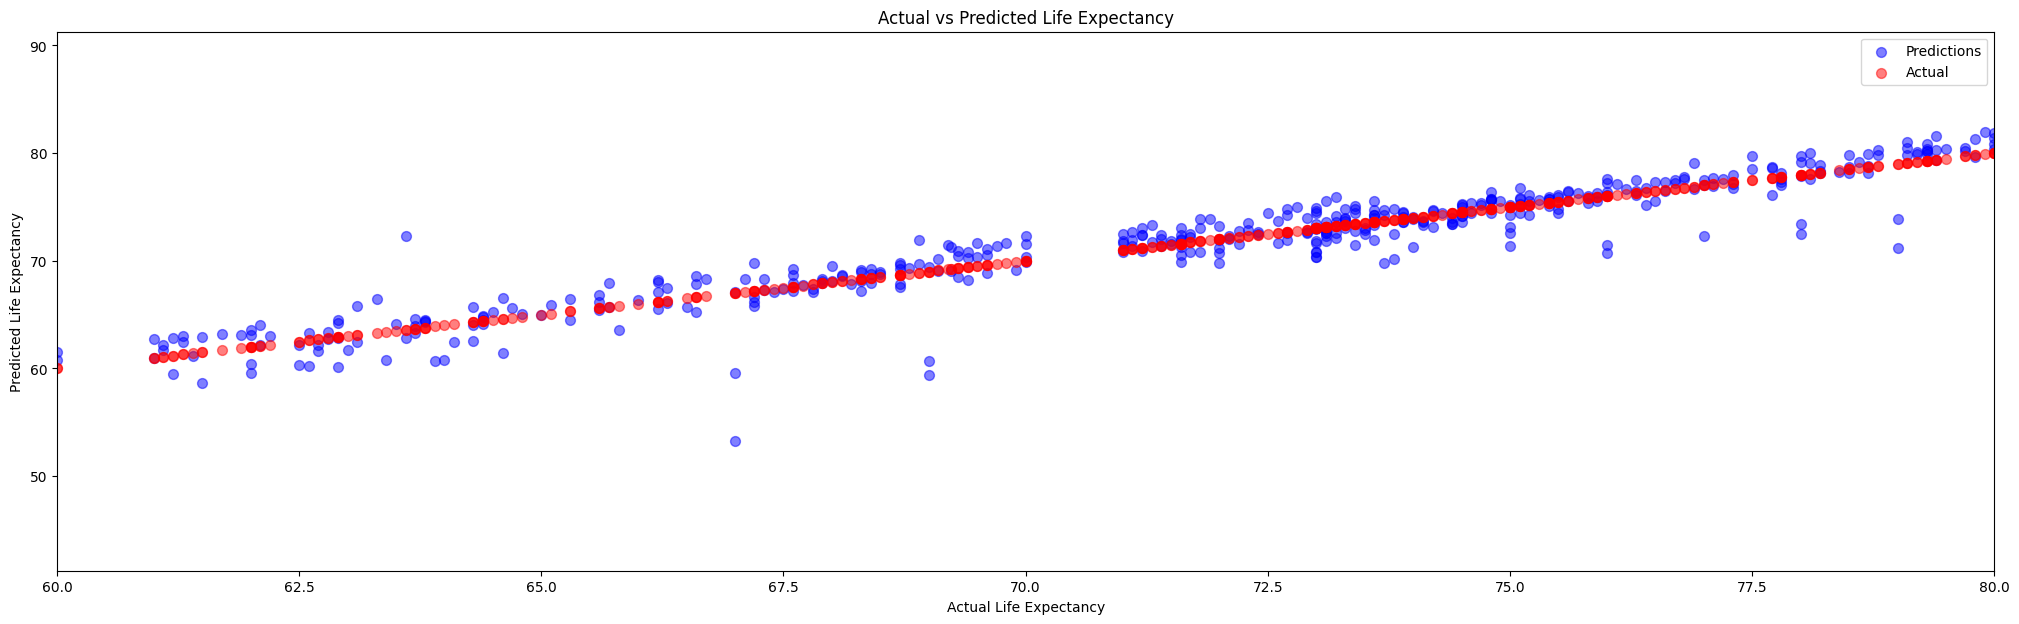

In [ ]:
import matplotlib.pyplot as plt


y_pred = best_ridge_model.predict(X_test)

# Calculate the mean squared error and R-squared for the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

# Generate a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, s=50, alpha=0.5, c='blue', label='Predictions')
plt.scatter(y_test, y_test, s=50, alpha=0.5, c='red', label='Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.xlim([60,80])
plt.legend()
plt.show()

Based on the scatterplot of predicted vs actual values, we can observe a strong correlation between the two variables, with most of the data points lying close to the 45-degree line. This indicates that the model is doing a good job of predicting the target variable, as the predicted values are very close to the actual values.

Furthermore, we can see that the bias of the model is relatively small, as the majority of the data points are clustered around the 45-degree line. This means that the model is not consistently over- or under-predicting the target variable, and is therefore well-balanced.

However, there are a few outliers the plot, which may indicate that the model is less accurate in predicting some values of the target variable.

**Kernel Ridge Regression :**
The following code takes approximately 4 minutes.

In [ ]:
from sklearn.kernel_ridge import KernelRidge

# Define the pipeline by adding KRR as the estimator
krr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', KernelRidge(kernel='rbf'))
])

# Define the hyperparameters to tune and their possible values
param_grid = {'estimator__alpha': [0.001, 0.01, 0.1],
              'estimator__gamma': [0.001, 0.01, 0.1]}

print("Best kernel ridge model using 5 splits :")
best_krr_model = hyperparameter_tuning(krr_model, X_train, y_train, param_grid, 'r2',5,9)
print("Best kernel ridge model using 10 splits : ")
best_krr_model_10 = hyperparameter_tuning(krr_model, X_train, y_train, param_grid, 'r2',10,9)

# Hyperparameter tuning for 20 folds is too slow
# print("Best kernel ridge model using 20 splits : ")
# best_ridge_model_20 = hyperparameter_tuning(krr_model, X, y, param_grid, 'r2',20)

Best kernel ridge model using 5 splits :
 Best hyperparameters:  {'estimator__gamma': 0.001, 'estimator__alpha': 0.001}
 Best score:  0.957517658858062
Best kernel ridge model using 10 splits : 
 Best hyperparameters:  {'estimator__gamma': 0.01, 'estimator__alpha': 0.01}
 Best score:  0.9591772714380987


In the best model using 10 splits, the optimal values for alpha and gamma are 0.1 and 0.01 respectively. This indicates that a moderate regularization and a relatively narrow Gaussian kernel produced the best results for the model.

In the best model using 5 splits, the optimal values for alpha and gamma are 0.001 and 0.001 respectively. This indicates that a stronger regularization and a narrower Gaussian kernel produced the best results for the model.


Mean squared error: 2.90
R-squared: 0.97


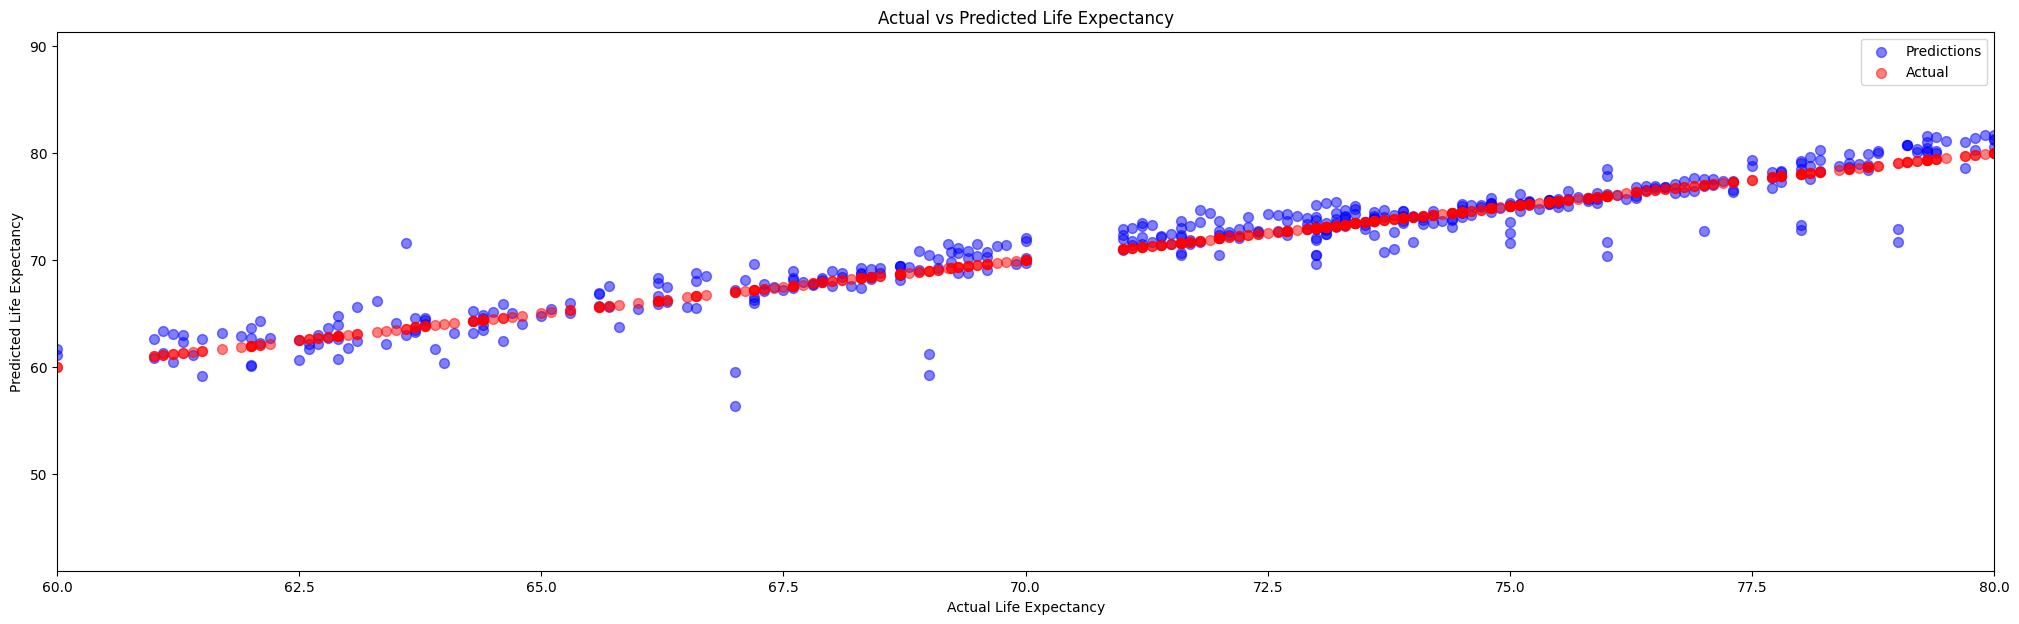

In [ ]:
y_pred = best_krr_model.predict(X_test)

# Calculate the mean squared error and R-squared for the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

# Generate a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, s=50, alpha=0.5, c='blue', label='Predictions')
plt.scatter(y_test, y_test, s=50, alpha=0.5, c='red', label='Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.xlim([60,80])
plt.legend()
plt.show()

Based on the scatterplot of predicted vs actual values, we can observe a strong correlation between the two variables, with most of the data points lying close to the 45-degree line. This indicates that the model is doing a good job of predicting the target variable, as the predicted values are very close to the actual values.

Furthermore, we can see that the bias of the model is relatively small, as the majority of the data points are clustered around the 45-degree line. This means that the model is not consistently over- or under-predicting the target variable, and is therefore well-balanced.

However, there are a few outliers the plot, which may indicate that the model is less accurate in predicting some values of the target variable.

**Lasso Regression :**

In [ ]:
# Define Lasso pipeline
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', Lasso())
])

# Define parameter grid for Lasso
lasso_param_grid = {
    'estimator__alpha': [0.1, 0.01, 0.001, 1]
}

# Perform hyperparameter tuning for Lasso
best_lasso_model = hyperparameter_tuning(lasso_model, X, y, lasso_param_grid, 'r2', 5,4)

 Best hyperparameters:  {'estimator__alpha': 0.001}
 Best score:  0.9513232327812989


Mean squared error: 3.14
R-squared: 0.96


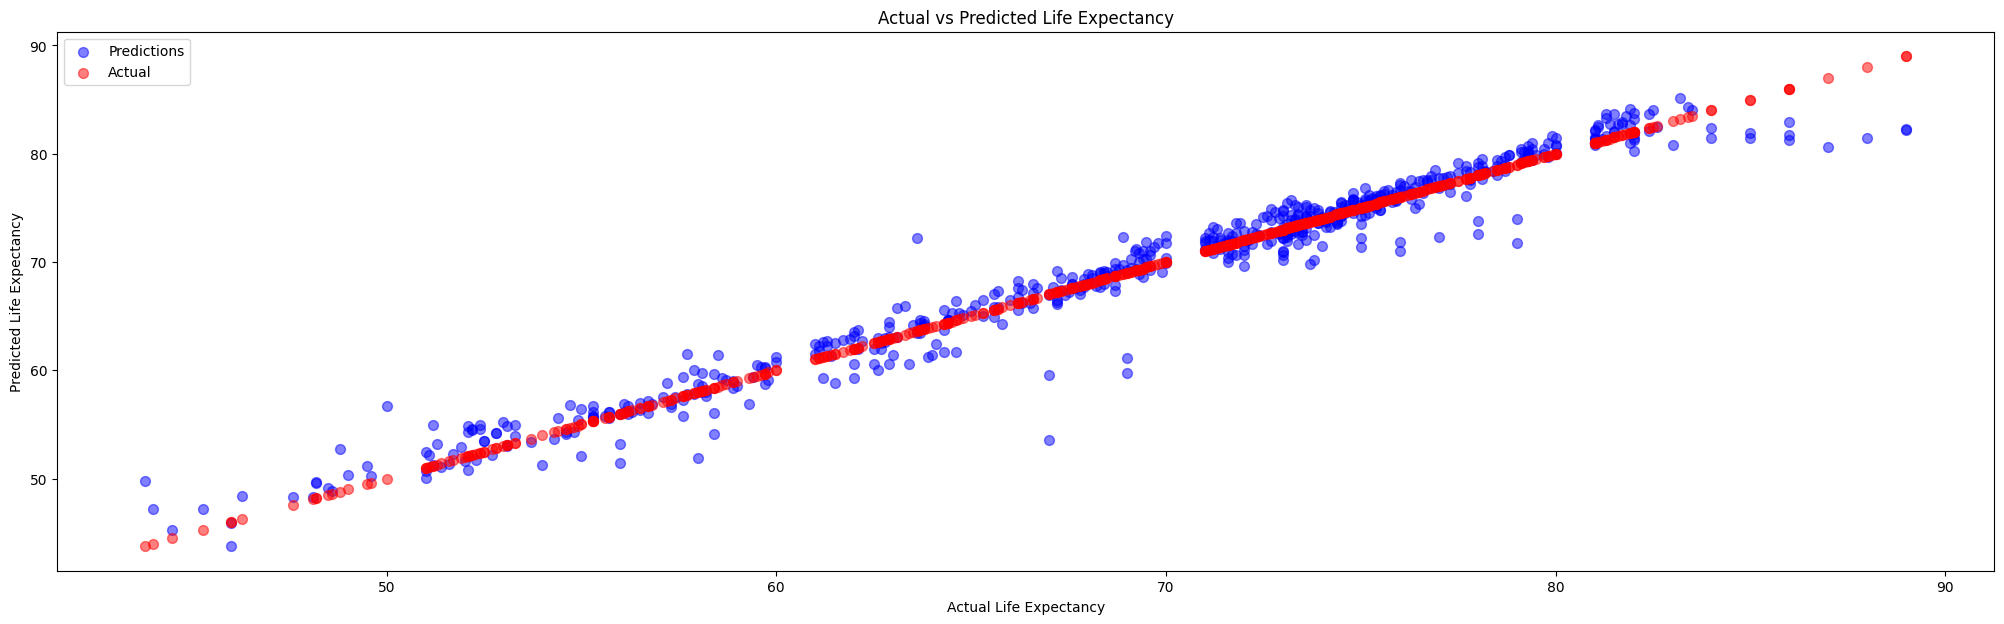

In [ ]:
# Make predictions on the testing data
y_pred = best_lasso_model.predict(X_test)

# Calculate the mean squared error and R-squared for the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

# Generate a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, s=50, alpha=0.5, c='blue', label='Predictions')
plt.scatter(y_test, y_test, s=50, alpha=0.5, c='red', label='Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend()
plt.show()


Similarly to previous models , we can observe a strong correlation between the two variables, with most of the data points lying close to the 45-degree line.

However, there are a few outliers the plot on the edges, which may indicate that the model is less accurate in predicting extreme values of the target variable.

**XGBoost Regression :**

XGBoost is a powerful algorithm that is widely used in machine learning. It is a type of gradient boosting that uses decision trees as its base estimators. The XGBoost algorithm has many hyperparameters that can be tuned to improve its performance.

The formula for the XGBoost algorithm can be expressed as follows:

$y_i = \phi(\mathbf{x}i) = \sum_{k=1}^{K} f_k(\mathbf{x}_i)$

where $y_i$ is the predicted output for input $\mathbf{x}_i$, $\phi$ is the function that maps inputs to predictions, $K$ is the number of regression trees in the model, and $f_k$ is the $k$-th regression tree.

In this notebook, we will focus on three hyperparameters of XGBoost: n_estimators, max_depth, and learning_rate.

n_estimators: This hyperparameter controls the number of trees in the XGBoost model. Increasing the number of trees can lead to better performance, but it also increases the computational cost.

max_depth: This hyperparameter controls the maximum depth of each tree in the XGBoost model. Increasing the maximum depth can lead to better performance, but it also increases the risk of overfitting.

learning_rate: This hyperparameter controls the step size at each iteration while moving towards a minimum of a loss function. Smaller learning rates will require more trees to be added to the model, but it can lead to better performance and can help avoid overfitting.



In [ ]:
from xgboost import XGBRegressor

# Define XGBoost pipeline
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', XGBRegressor())
])

# Define parameter grid for XGBoost
xgb_param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [3, 5, 7],
    'estimator__learning_rate': [0.1, 0.01, 0.001]
}

# Perform hyperparameter tuning for XGBoost
best_xgb_model = hyperparameter_tuning(xgb_model, X_train, y_train, xgb_param_grid, 'r2', 5)


 Best hyperparameters:  {'estimator__n_estimators': 100, 'estimator__max_depth': 3, 'estimator__learning_rate': 0.1}
 Best score:  0.9616590067960905


Mean squared error: 2.63
R-squared: 0.97


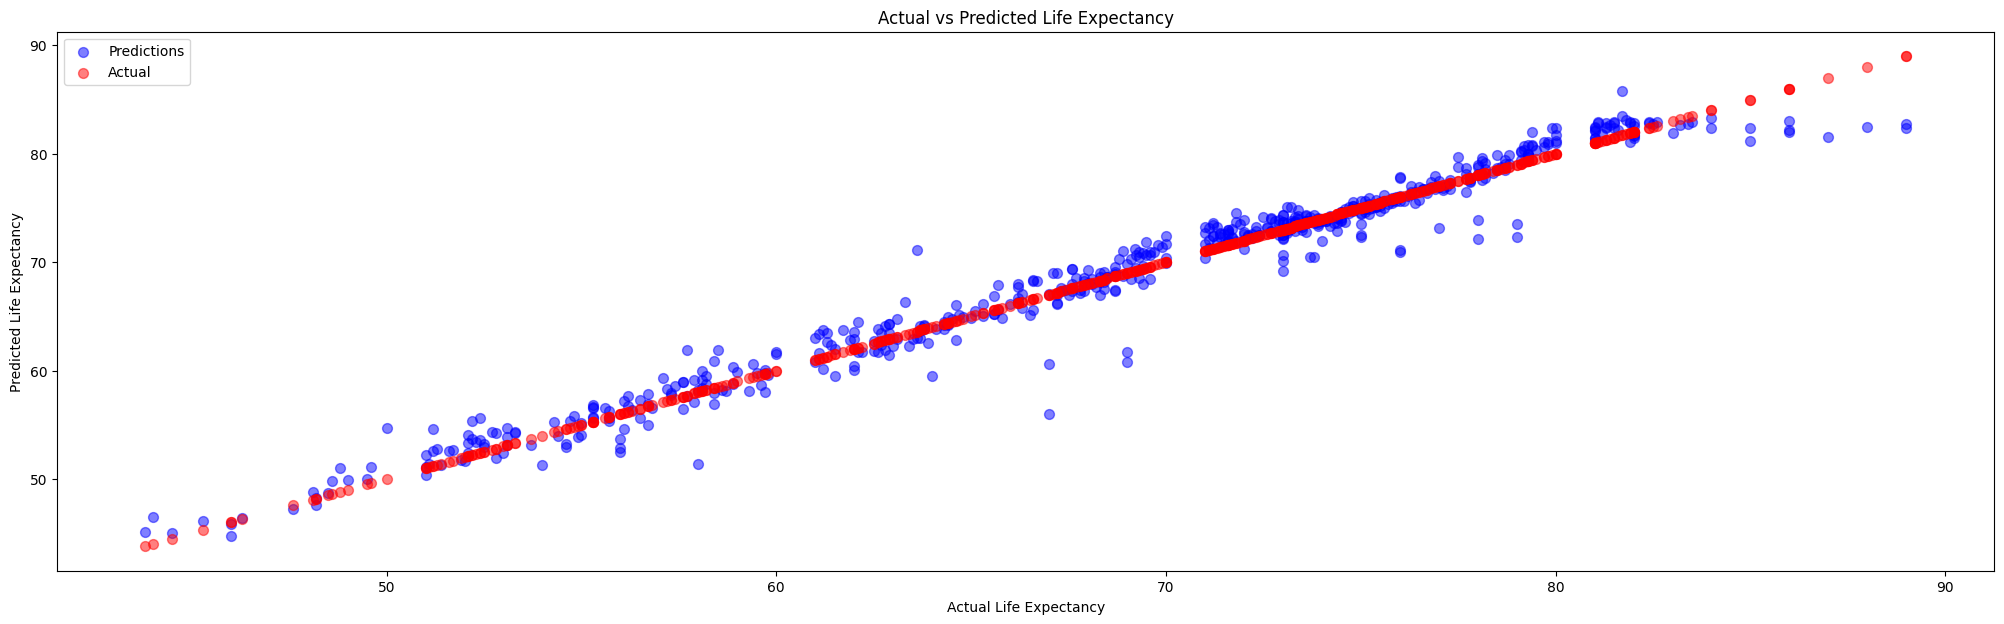

In [ ]:
# Make predictions on the testing data
y_pred = best_xgb_model.predict(X_test)

# Calculate the mean squared error and R-squared for the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

# Generate a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, s=50, alpha=0.5, c='blue', label='Predictions')
plt.scatter(y_test, y_test, s=50, alpha=0.5, c='red', label='Actual')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.legend()
plt.show()

Similarly to previous models, we can observe a strong correlation between the two variables, with most of the data points lying close to the 45-degree line.

However, there are a few outliers the plot on the edges, which may indicate that the model is less accurate in predicting extreme values of the target variable.

# Model Selection

After finding the optimal hyperparameters for each algorithm, we will proceed with model selection. Model selection involves choosing the best performing model among a set of candidate models based on their performance metrics.

In [ ]:
best_models = {
                'Linear Regression' : Pipeline(steps=[('preprocessor', preprocessor),('estimator', LinearRegression())]),
                'Ridge' : best_ridge_model,
                'KRR' : best_krr_model,
                'Lasso' : best_lasso_model,
                'XGBoost' : best_xgb_model
              }

results = fit_evaluate(best_models, X_train, X_test, y_train, y_test)
results

,mean_absolute_error,mean_squared_error,train_R_squared,test_R_squared
Linear Regression,1.235237,1.879875,0.957081,0.959209
Ridge,1.233322,1.878650,0.956949,0.959262
KRR,1.092198,1.704288,0.969199,0.966473
Lasso,1.234137,1.881035,0.957074,0.959159
XGBoost,1.051361,1.621281,0.976815,0.969660


The mean_absolute_error (MAE) and mean_squared_error (MSE) for XGBoost are the lowest among all models, indicating that XGBoost has the lowest average magnitude of error and lowest average squared error.

The train_R_squared and test_R_squared for XGBoost are also the highest among all models, indicating that XGBoost explains more variance in the target variable and has better predictive performance on unseen data.

On the other hand, KRR is the second-best performing model, with lower MAE and MSE than all other models except for XGBoost. However, XGBoost still outperforms KRR in terms of train_R_squared and test_R_squared.

Linear Regression, Ridge, and Lasso have similar performance, with slightly higher MAE and MSE and slightly lower train_R_squared and test_R_squared than KRR. However, Lasso has the highest MAE and MSE among all models.

**Overall, XGBoost is the top-performing model in this comparison and can be considered the best choice for this dataset and problem.**